In [26]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# Uploading Dataset
df = pd.read_csv('survey lung cancer.csv')

In [28]:
# Quick check how data looks like
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [7]:
# Check null values
df.isnull().sum()

,0
GENDER,0
AGE,0
SMOKING,0
YELLOW_FINGERS,0
ANXIETY,0
PEER_PRESSURE,0
CHRONIC DISEASE,0
FATIGUE,0
ALLERGY,0
WHEEZING,0


In [8]:
# No. of rows and columns in Dataset
df.shape

(309, 16)

In [9]:
# Check Datatype and null data in columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [10]:
# Check for duplicates
print("Duplicate rows:", df.duplicated().sum())

# Drop duplicates if any
df.drop_duplicates(inplace=True)

Duplicate rows: 33


In [11]:
# Preview unique values in each column
for col in df.columns:
    print(f"{col}: {df[col].unique()}")

GENDER: ['M' 'F']
AGE: [69 74 59 63 75 52 51 68 53 61 72 60 58 48 57 44 64 21 65 55 62 56 67 77
 70 54 49 73 47 71 66 76 78 81 79 38 39 87 46]
SMOKING: [1 2]
YELLOW_FINGERS: [2 1]
ANXIETY: [2 1]
PEER_PRESSURE: [1 2]
CHRONIC DISEASE: [1 2]
FATIGUE : [2 1]
ALLERGY : [1 2]
WHEEZING: [2 1]
ALCOHOL CONSUMING: [2 1]
COUGHING: [2 1]
SHORTNESS OF BREATH: [2 1]
SWALLOWING DIFFICULTY: [2 1]
CHEST PAIN: [2 1]
LUNG_CANCER: ['YES' 'NO']


In [12]:
# No of Rows and Columns after removing Duplicate values
df.shape

(276, 16)

In [13]:
# Column Name
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

# Exploratory Data Analysis (EDA)

/tmp/ipython-input-14-3292241069.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='GENDER', palette='pastel')


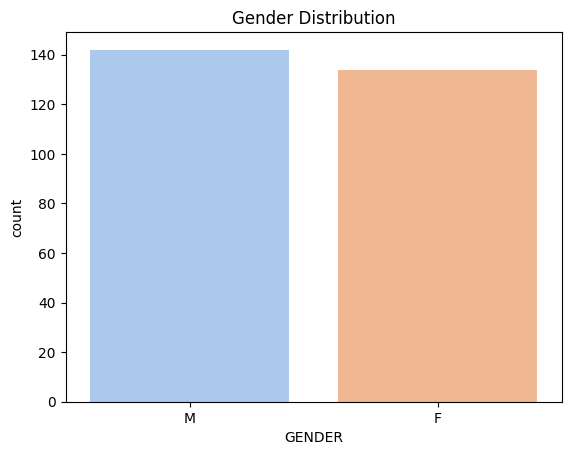

In [14]:
# Plot Gender Distribution
sns.countplot(data=df, x='GENDER', palette='pastel')
plt.title('Gender Distribution')
plt.show()

/tmp/ipython-input-15-3450121302.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='LUNG_CANCER', palette='Set2')


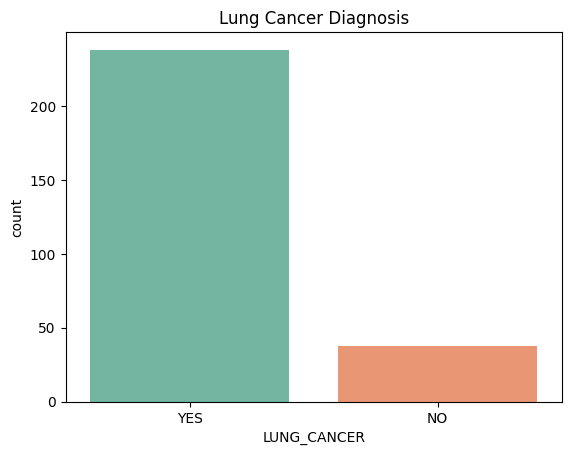

In [15]:
# Plot Lung Cancer Diagnosis
sns.countplot(data=df, x='LUNG_CANCER', palette='Set2')
plt.title('Lung Cancer Diagnosis')
plt.show()

/tmp/ipython-input-17-2848163102.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='SMOKING', palette='muted')


Text(0.5, 1.0, 'Smoking Status')

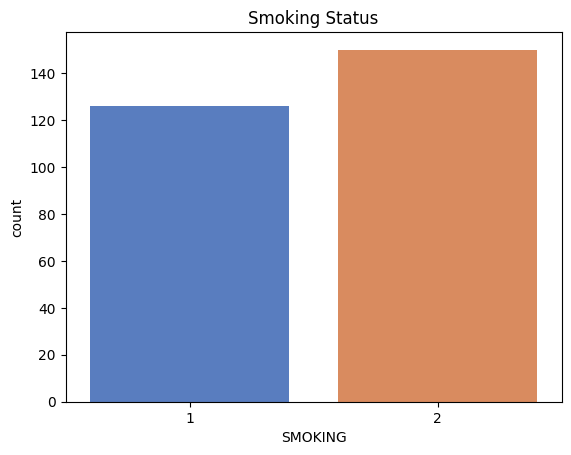

In [17]:
# Smoking vs Non-smoking
sns.countplot(data=df, x='SMOKING', palette='muted')
plt.title('Smoking Status')

/tmp/ipython-input-18-3493761802.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='AGE_GROUP', palette='Blues')


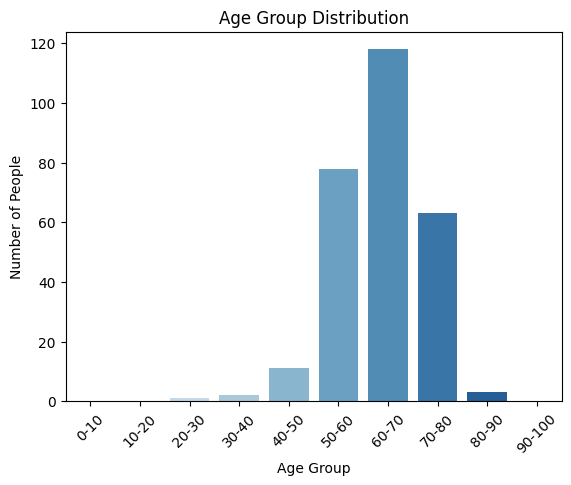

In [18]:
# Define bins (0–100 in steps of 10)
bins = list(range(0, 101, 10))  # [0, 10, 20, ..., 100]
labels = [f'{i}-{i+10}' for i in bins[:-1]]

# Create a new column with age groups
df['AGE_GROUP'] = pd.cut(df['AGE'], bins=bins, labels=labels, right=False)

# Countplot of age groups
sns.countplot(data=df, x='AGE_GROUP', palette='Blues')
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Number of People')
plt.xticks(rotation=45)
plt.show()



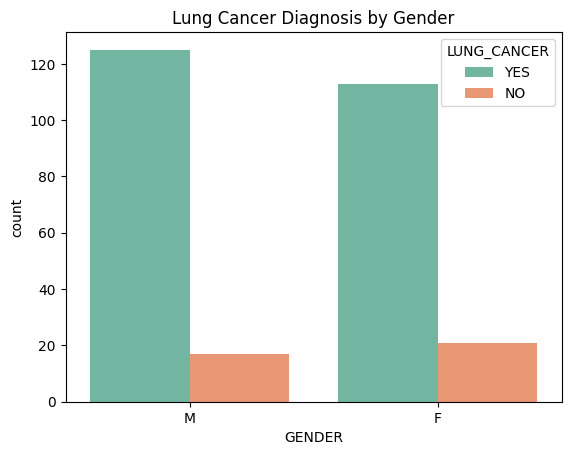

In [21]:
sns.countplot(data=df, x='GENDER', hue='LUNG_CANCER', palette='Set2')
plt.title('Lung Cancer Diagnosis by Gender')
plt.show()


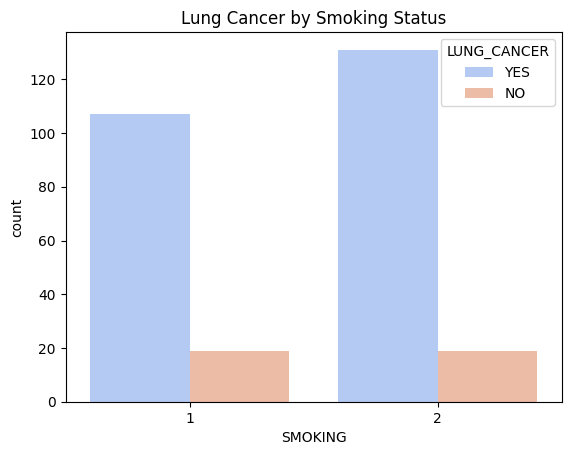

In [22]:
sns.countplot(data=df, x='SMOKING', hue='LUNG_CANCER', palette='coolwarm')
plt.title('Lung Cancer by Smoking Status')
plt.show()


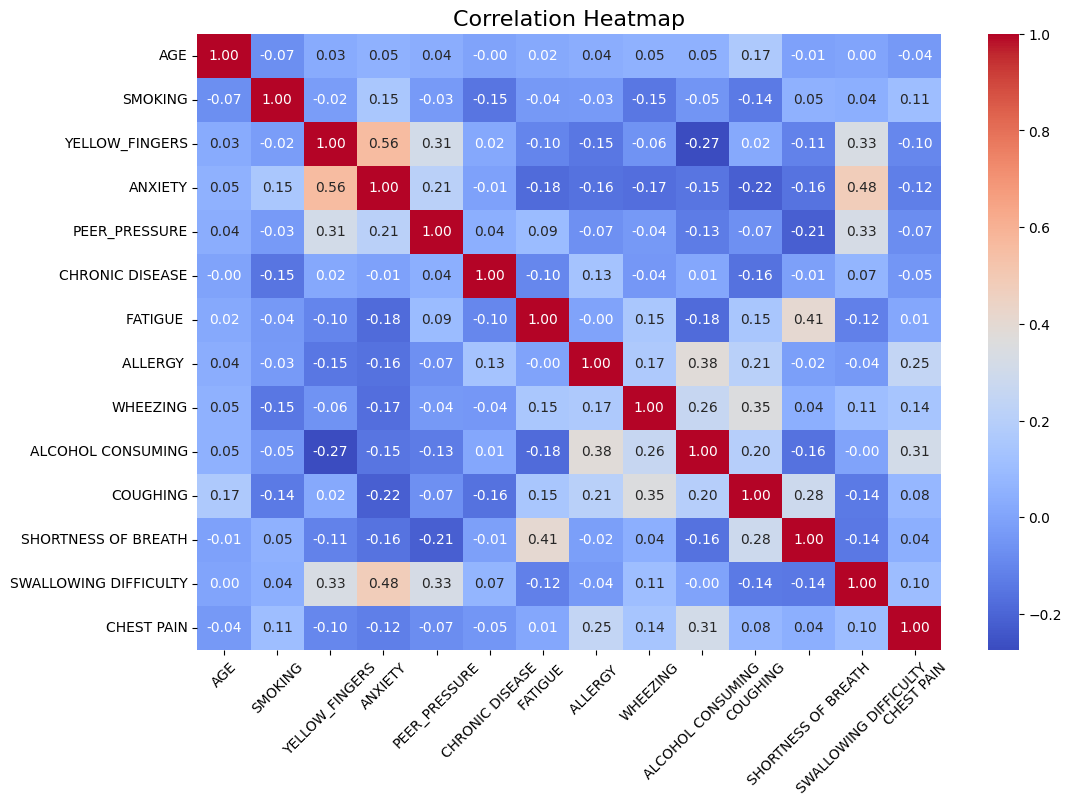

In [24]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()